# Least squares regressions

<div class="alert alert-warning"><b>Attention</b><br/>
Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi/#/blueprint/24958184a3954101a2c701b6d1056feb"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson and fill in their student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/introqg/notebooks/master?urlpath=lab/tree/L2/least-squares.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>
</div>

*Least squares regressions* are a common way of determining whether two values are *linearly* related to one an other. In other words, this is a method to determine whether a line is a good "fit" to some measured values. Not all data should be expected to be fit well by a line, but linear regressions are a powerful method for determining cases when two variables are directly related to one another. A common example might be the temperature at which magma erupts versus the SiO<sub>2</sub> content of the magma, as shown below in Figure 2.1.

![Magma temperatures](img/magma-temps.png)

_**Figure 2.1**. Eruption temperatures of magmas as a function of their SiO<sub>2</sub> content with a linear regression line. Source: Figure 16.1 from [McKillup and Dyar, 2010](http://www.cambridge.org/fi/academic/subjects/earth-and-environmental-science/earth-science-general-interest/geostatistics-explained-introductory-guide-earth-scientists?format=HB&isbn=9780521763226)._


The general idea with calculating a *linear regression* is that we want to find the equation of a line that best fits some $x$-$y$ data, such as temperature and SiO<sub>2</sub> content in the example above. To do this, we first need to recall the equation for a line:

$$
\large
y = A + B x
$$
where $x$ and $y$ are the coordinates of the data points, $A$ is the $y$-intercept, and $B$ is the slope of the line.

Thus, in order to calculate a "best fit" line to some data, we will need to determine the values of the constants $A$ and $B$. Consider the example below in which $A$ and $B$ are known. If we make the rather common assumption that the uncertainties for the values on the $x$ axis are negligible compared to the uncertainties along the $y$ axis, we can say:

$$
\large
(\mathrm{true~value~of~}y_{i}) = A + B x_{i}
$$

Thus, it is possible to find the value of $y$ for two linearly related values when $A$ and $B$ are known.

Finding the values of $A$ and $B$ then for the case of a linear regression to some $x$-$y$ data is fairly straightforward, though it does involve a bit of algebra. For our purposes, I'll refer you to Chapter 8 of [Taylor, 1997](http://www.uscibooks.com/taylornb.htm) for a complete explanation of how to find $A$ and $B$, and simply present the relevant equations below. The value of the $y$-intercept can be found using

$$
\large
A = \frac{\sum{x^{2}} \sum{y} - \sum{x} \sum{xy}}{\Delta}
$$

where $x$ is the $i$th data point plotted on the $x$-axis, $y$ is the $i$th data point plotted on the $y$-axis, and $\Delta$ is defined below.

The line slope can be found using

$$
\large
B = \frac{N \sum{xy} - \sum{x} \sum {y}}{\Delta}
$$

where $N$ is the number of values in the regression.

And the value of $\Delta$ is

$$
\large
\Delta = N \sum{x^{2}} - \left( \sum{x} \right)^{2}
$$

With the equations above, you are now able to calculate *unweighted* regression lines, the best-fit lines to some $x$-$y$ data in which the uncertainties in the measurements are not considered to influence the fit of the line. It is also possible to fit regression lines that consider the variable uncertainties in the data, referred to as *weighted regressions*, but will will not consider that type of regression for the time being.

## In-class demonstration space

The cell below can be used for following live demonstrations during the class lesson.

In [2]:
# Coding done during class time goes below

# Import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Create NumPy arrays with our toy dataset
ages = np.array([34, 22, 22, 27, 31, 29, 22, 23, 20])
elev = np.array([210, 120, 120, 210, 150, 120, 120, 120, 90])

In [94]:
# Calculate our slope and y-intercept
delta = len(ages) * (ages**2).sum() - (ages.sum())**2
a = (((ages**2).sum() * elev.sum()) - (ages.sum() * (ages * elev).sum())) / delta
b = ((len(ages) * (ages * elev).sum()) - (ages.sum() * elev.sum())) / delta

In [95]:
print(f"Slope: {b}")

Slope: 6.413551401869159


In [96]:
print(f"Intercept: {a}")

Intercept: -23.901869158878505


Text(28, 100, 'Correlation coefficient: 0.74')

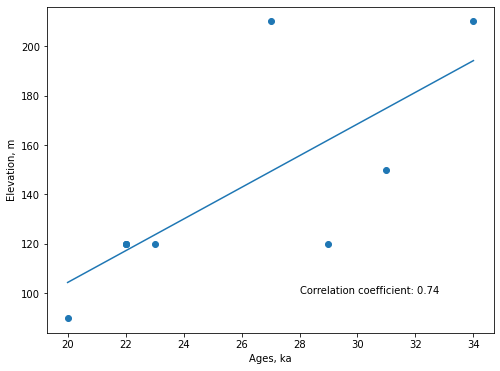

In [101]:
# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot data
ax.scatter(ages, elev)
ax.plot([ages.min(), ages.max()], [a + b * ages.min(), a + b * ages.max()])
ax.set_xlabel('Ages, ka')
ax.set_ylabel('Elevation, m')
ax.text(28, 100, f"Correlation coefficient: {r:.2f}")

$$
\large
r = \frac{\sum{\left(x_{i} - \bar{x} \right)\left(y_{i} - \bar{y} \right)}}{\sqrt{\sum{\left(x_{i} - \bar{x} \right)^2} \sum{\left(y_{i} - \bar{y} \right)^2}}},
$$

In [100]:
# Initialize our summing variables
topsum = 0
bottomsumx = 0
bottomsumy = 0

# Calculate our top and bottom sums
for i in range(len(ages)):
    topsum = topsum + (ages[i] - ages.mean()) * (elev[i] - elev.mean())
    bottomsumx = bottomsumx + (ages[i] - ages.mean())**2
    bottomsumy = bottomsumy + (elev[i] - elev.mean())**2

# Calculate r
r = topsum / np.sqrt(bottomsumx * bottomsumy)

# Print out result
print(f"Correlation coefficient: {r:.2f}")

Correlation coefficient: 0.74


0.00641

0.0008399999999999999